In [1]:
# import libraries
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Input
from mpl_toolkits.mplot3d import Axes3D
from numpy import arange

import tensorflow as tf
import keras
from keras import layers, models

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [2]:
# Function to create a new model
def create_model(features, num_layers=3, units=200, activation='sigmoid'):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(shape=(features,)))  # Set to the number of features
    
    # Dense layers
    for _ in range(num_layers):
        model.add(keras.layers.Dense(units, activation=activation))
    
    model.add(keras.layers.Dense(1, activation='linear'))  # Output layer for regression
    return model

def clean_data(data_set):
    # Convert 'Sex' to numeric (male = 0, female = 1)
    data_set['Sex'] = data_set['Sex'].map({'male': 0, 'female': 1}) # i learned how to map String to numbers

    # Handle missing values in 'Age' and 'Fare' by filling median
    data_set['Age'] = data_set['Age'].fillna(data_set['Age'].median()) # i learned to fill na with median
    data_set['Fare'] = data_set['Fare'].fillna(data_set['Fare'].median())
    return data_set

In [3]:
# read train.csv data file
train_data = pd.read_csv('train.csv')
print(f'train {len(train_data.index)} instances')
# read test.csv data file
    ### unused (cant evaluate)
    # test_data = pd.read_csv('test.csv')
    # print(f'test {len(test_data.index)} instances')
print('<< read successfully >>')

train 891 instances
<< read successfully >>


In [4]:
# show data
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
## model 1
# Select relevant columns
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']
target = 'Survived'

# Filter the data based on features and target
filtered_data = train_data[features + [target]]
clean_data(filtered_data)

    # filtered_test_data = test_data[features]
    # clean_data(filtered_test_data)
# Print
filtered_data

C:\Users\Admin\AppData\Local\Temp\ipykernel_7108\1571480462.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Sex'] = data_set['Sex'].map({'male': 0, 'female': 1}) # i learned how to map String to numbers
C:\Users\Admin\AppData\Local\Temp\ipykernel_7108\1571480462.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Age'] = data_set['Age'].fillna(data_set['Age'].median()) # i learned to fill na with median
C:\Users\Admin\AppData\Local\Temp\ipykernel_7108\1571480462.py:19: SettingWithC

,Pclass,Sex,Age,Fare,SibSp,Parch,Survived
0,3,0,22.0,7.2500,1,0,0
1,1,1,38.0,71.2833,1,0,1
2,3,1,26.0,7.9250,0,0,1
3,1,1,35.0,53.1000,1,0,1
4,3,0,35.0,8.0500,0,0,0
...,...,...,...,...,...,...,...
886,2,0,27.0,13.0000,0,0,0
887,1,1,19.0,30.0000,0,0,1
888,3,1,28.0,23.4500,1,2,0
889,1,0,26.0,30.0000,0,0,1


<Figure size 1000x600 with 0 Axes>

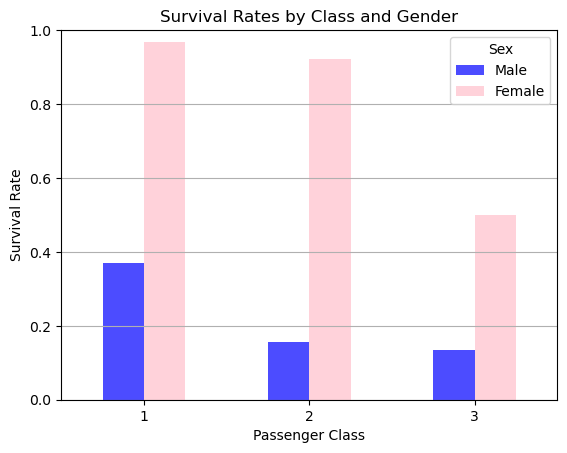

In [7]:
# Drawing bar graph
# Calculate survival rates based on 'Sex' and 'Pclass'
survival_rates = filtered_data.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# Plotting
plt.figure(figsize=(10, 6))
survival_rates.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.title('Survival Rates by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

In [11]:
# creating model
tf.keras.backend.clear_session() # reset session
model1 = create_model(len(features))
print("Model 1")
print(model1.summary())

Model 1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,001 (320.32 KB)

 Trainable params: 82,001 (320.32 KB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
# training models

# Train setup
loss = 'binary_crossentropy'  # appropriate for binary classification
metric = 'accuracy'  # switch to accuracy
epochs = 120  # number of epochs

# Split Data
x_train, x_val, y_train, y_val = train_test_split(filtered_data[features], filtered_data[target], test_size=0.2, random_state=42)

# Train
model1.compile(loss=loss, optimizer='adam', metrics=[metric])
history = model1.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=1, validation_data=(x_val, y_val))

Epoch 1/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6265 - loss: 6.0204 - val_accuracy: 0.5866 - val_loss: 6.6633
Epoch 2/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6131 - loss: 6.2366 - val_accuracy: 0.5866 - val_loss: 6.6633
Epoch 3/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6173 - loss: 6.1682 - val_accuracy: 0.5866 - val_loss: 6.6633
Epoch 4/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6180 - loss: 6.1570 - val_accuracy: 0.5866 - val_loss: 6.6633
Epoch 5/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6062 - loss: 6.3465 - val_accuracy: 0.5866 - val_loss: 6.6633
Epoch 6/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6276 - loss: 6.0018 - val_accuracy: 0.5866 - val_loss: 6.6633
Epoch 7/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6014 - loss: 6.4253 - val_accuracy: 0.5866 - val_loss: 6.6633
Epoch 8/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6256 - loss: 6.0341 - val_accuracy: 0.5866 - 

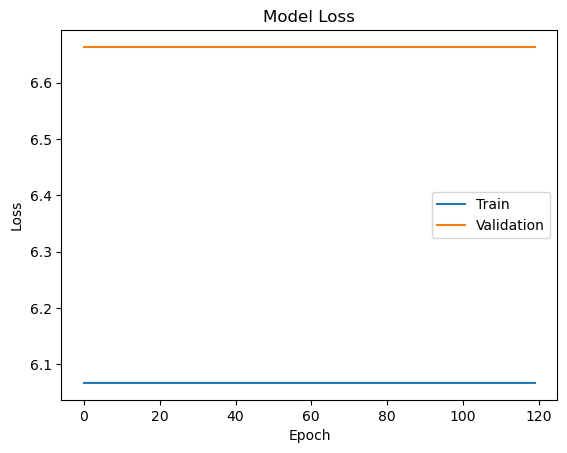

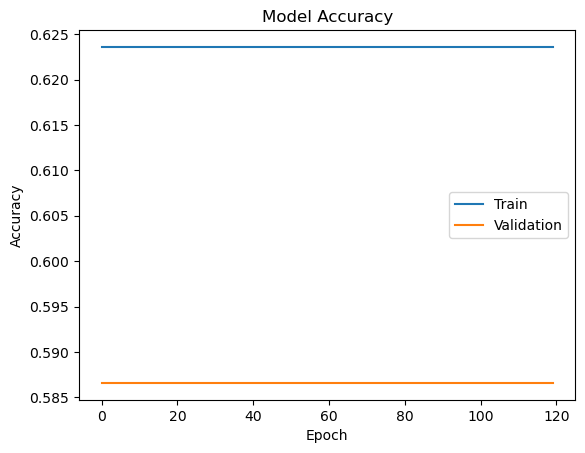

In [14]:
# Display loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Display accuracy:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


In [ ]:
# Test the model

# Use the test.csv data (test_data) to make predictions after training
X_test = pd.get_dummies(filtered_test_data)  # Make sure test data is preprocessed similarly to train data

# Predict using the trained model
test_predictions = model1.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Flatten 
test_predictions = test_predictions.flatten()  # Ensure it's a 1D array

output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Prediction': test_predictions})
output['Prediction'] = output['Prediction'].round().astype(int).map({0: 'dead', 1:'alive'})

print(output)

     PassengerId Prediction
0            892       dead
1            893      alive
2            894       dead
3            895       dead
4            896      alive
..           ...        ...
413         1305       dead
414         1306      alive
415         1307       dead
416         1308       dead
417         1309       dead

[418 rows x 2 columns]


In [ ]:
# second model
